<a href="https://colab.research.google.com/github/vajiha110/FMML_IIITH_PROJECTS/blob/main/AIML_Module_5_Lab_2_Loss_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression Lab 2: Loss Functions


## Motivation

The main goal of machine learning tasks is to "learn" something about data we feed to our models. But how does the model actually learn anything? To understand this, we need to first understand what objective functions are.

Mathematically, objective functions are a function whose values we desire to minimize/maximize. In the context of machine learning, the objective is commonly referred to as a **loss function**. Loss functions indicate how well the model is doing on the dataset.

The value of the objective function is simply called **loss**. Our goal is to eventually find the best model parameters that has the least average loss on the data after training.


We are familiar with the idea of **error** from the linear regression lab. RMSE is a common loss function used in machine learning. However, there are many other loss functions employed, depending on what the task is (classification, regression etc.). In this lab, we will take a look at some common loss functions, and understand why they are used where they are.


In [28]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# interactive visualization

# 1. Regression


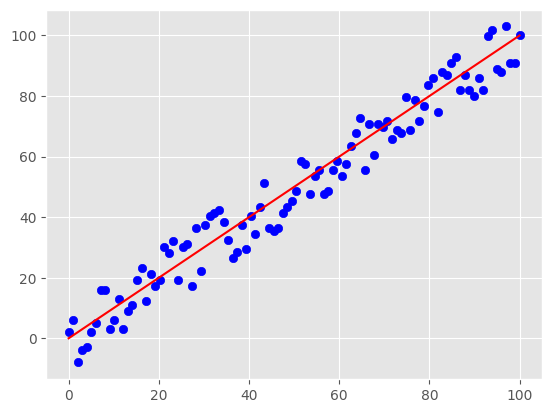

In [29]:
# initializing random data

np.random.seed(0)
x = np.linspace(0,100,100)
y_actual = np.copy(x)
y_pred = x + np.random.randint(-10,10,100)

plt.plot(x,y_actual,color="red")
plt.scatter(x,y_pred,color="blue")
plt.show()

### Mean Squared Error

As we have seen before, the formula for MSE is

$MSE = \frac{1}{m} \sum_{i=1}^n (y-y_p)^2$

The image below depicts a visualization of what the squared error is.

<img src="https://drive.google.com/uc?export=view&id=12jmqRrrqknIWKhwRpgRIJAErBjkEcyx9" width="350" height="350" align="middle"/>

MSE is also referred to as L2 loss.

Typically, we would want the units of error to be the same as the data, so we use Root Mean Squared Error instead.



In [30]:
mse = np.mean((y_actual-y_pred)**2)
print("MSE is: {}".format(mse))
print("RMSE is: {}".format(np.sqrt(mse)))

MSE is: 38.68
RMSE is: 6.219324722186485


### Mean Absolute Error

$MAE = \frac{1}{m} \sum_{i=1}^n |y-y_p|$

MAE is also commonly referred to as L1 loss.

In [31]:
mae = np.mean(np.abs(y_actual-y_pred))
print("MAE is: {}".format(mae))

MAE is: 5.5


MSE penalizes the model for making large errors by squaring the difference. However, this also means that MSE cannot handle outliers well, since they would throw the model off.

On the other hand, MAE is robust to outliers. But, MAE is non-differentiable, making it difficult to perform mathematical operations on it.

Hence, RMSE is most commonly used as a metric for evaluation.

# 2. Classification

Classification tasks involve some data, along with labels assigned to that data. For example, we may have pictures of cats and dogs, and the corresponding labels assigned to those images. We then want to train a model that can predict a label for some input image belonging to either label class (cat or dog).

## The concept of maximum likelihood

Ideally, we would want to obtain a model $\hat{\theta}$ which maximizes the probability of correctly predicting data. Mathematically, the likelihood is:

$ \prod_{i=1}^{N}  \: \hat{\theta_i}^{\theta_i}$

This is because our actual data ($\theta_i$) is either 0 or 1 depending on the label of the data, and our predicted data ($\hat{\theta_i}$) is a probability.

We usually consider the negative log of the likelihood, since log is monotonic and easier to deal with as an optimization problem.

Hence, we have

$MLE = $ arg min $\: - \sum_{i=1}^{N} \theta_i \: log \: \hat{\theta_i}$

\


## Entropy and Cross-Entropy

For some event $x$, we can obtain **information** based on its probability distribution. For example, for some event that occurs with $p=1$, we gain no information. Now, if we flip a coin and see that we obtained heads, we say that we got 1 bit of information.

Thus, the information $I$ of some event $x$ is:

$I = -log_2 \: p(x)$

We say that events with a low probability of occuring give high information, and those with a low probability give low information.

Now, if we have some random variable $X$, its **entropy** is the expected value of the information obtained.

$H(x) = - \sum_{k} p_k \: log \: p_k$

Now, suppose we are trying to correctly predict labels of some data. Let P be the true distribution of the labels, and Q be the predicted distribution of labels.

Cross-Entropy is then defined as:

$H(P,Q) = - \sum_{x} P(x)\: log \: Q(x)$

which is basically the entropy between two probability distributions over the same events.

\


## MLE and Cross-Entropy

So, in the case of classification, the equation for minimization of the cross-entropy between the actual data and the predicted data would be:

arg min $\: -\sum_{i=1}^{N} P(x) \: log \: Q(x)$

$= $ arg min $\: -\sum_{i=1}^{N} \theta_i \: log \: \hat{\theta_i}$


which is exactly the same as what we had obtained for minimizing the negative log likelihood. Hence, the two problems are equivalent.

1/1+e^(-x)

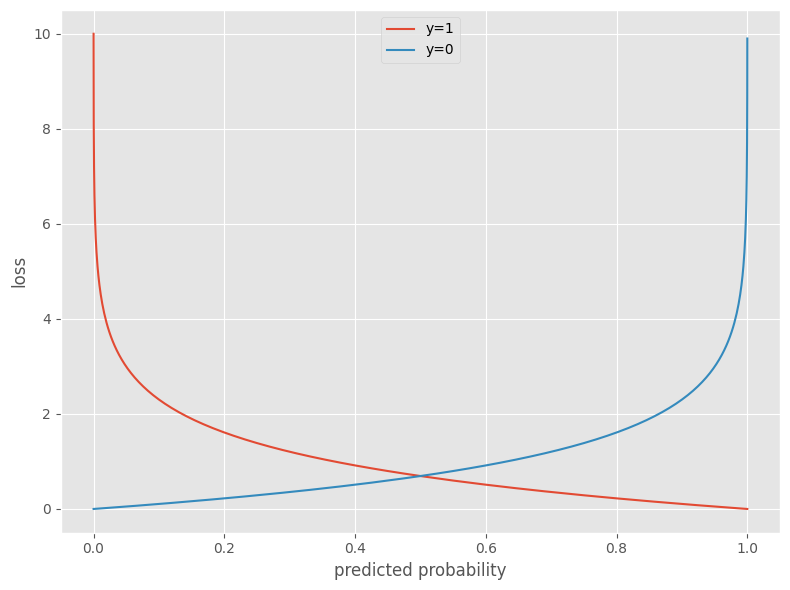

In [32]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

def cross_entropy_loss(y_,y):
  if y==1:
    return -np.log(y_)

  return -np.log(1-y_)

z = np.arange(-10, 10, 0.1)
h_z = sigmoid(z)

cost_1 = cross_entropy_loss(h_z, 1)
cost_0 = cross_entropy_loss(h_z, 0)

fig, ax = plt.subplots(figsize=(8,6))
plt.plot(h_z, cost_1, label='y=1')
plt.plot(h_z, cost_0, label='y=0')
plt.xlabel('predicted probability')
plt.ylabel('loss')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## KNN-regression

Till now, we have studied KNN as a classification algorithm, which uses feature similarity and voting to decide the class labels of unseen data.

For regression, we use the same idea: We take the y-values of the k nearest neighbours, and compute their average, which is our predicted y-value. We do this for every x whose value we want to predict.

In the visualization below, we have k=3, and the red dots are the new x-values whose output we want to predict.

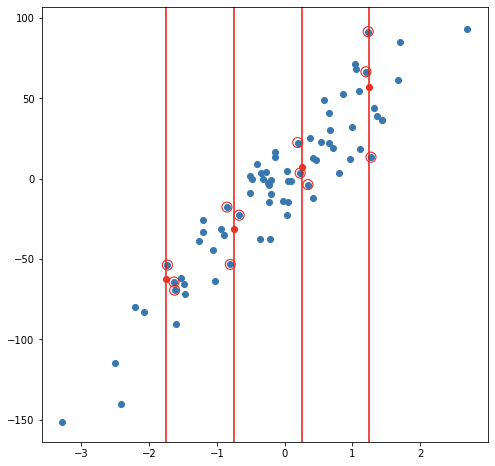

In [33]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [34]:
train_path = "https://raw.githubusercontent.com/PranavTadimeti/Regression-lab2/main/BigMart-train.csv"

train = pd.read_csv(train_path)

In [35]:
# Preprocess Data

def preprocess(df):
  mean_weight = df['Item_Weight'].mean()
  df['Item_Weight'].fillna(mean_weight,inplace=True)

  mode_size = df['Outlet_Size'].mode()
  df['Outlet_Size'].fillna(mode_size,inplace=True)

  df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

  return pd.get_dummies(df)

train = preprocess(train)

train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [36]:
train , test = train_test_split(train, test_size = 0.3)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

In [37]:
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [38]:
def knn_regression(k,x_train,y_train,x_test,y_test):
    model = neighbors.KNeighborsRegressor(n_neighbors = k)

    model.fit(x_train, y_train)
    pred=model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)


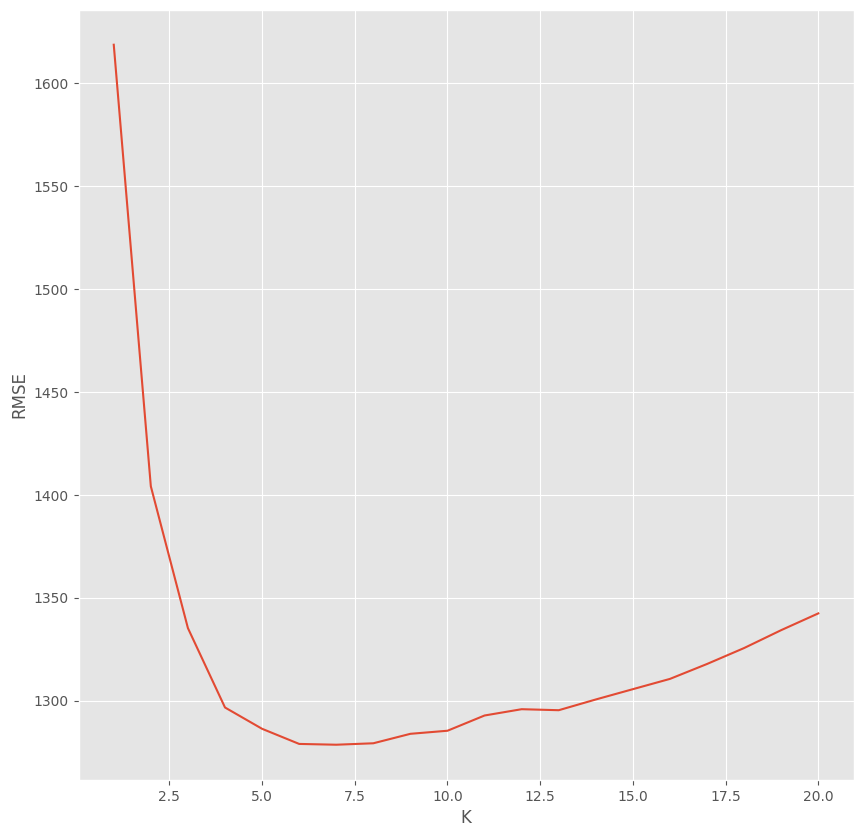

Minimum RMSE 1278.5816281094171 is at k = 6


In [39]:
rmse_val = []

for k in range(1, 21):
    knn_regression(k, x_train, y_train, x_test, y_test)

figure = plt.figure(figsize=(10, 10))
plt.plot(np.arange(1, 21), rmse_val)
plt.xlabel("K")
plt.ylabel("RMSE")
plt.show()

rmse_val = np.asarray(rmse_val)
print("Minimum RMSE {} is at k = {}".format(np.min(rmse_val), np.argmin(rmse_val)))


## Exercises

1. Try out these loss functions on regression tasks, and try to understand the model performance based on the loss function.
2. Explore other loss functions and try to understand when and why they are used.
3. Try out KNN-regression on other datasets see which values of K give the best results.

1.Try out these loss functions on regression tasks, and try to understand the model performance based on the loss function.

In [40]:
def knn_regression(k, x_train, y_train, x_test, y_test, loss_function='mse'):
    if loss_function == 'mse':
        model = neighbors.KNeighborsRegressor(n_neighbors=k)
    elif loss_function == 'mae':
        model = neighbors.KNeighborsRegressor(n_neighbors=k, metric='manhattan')
    else:
        raise ValueError("Unsupported loss function. Choose 'mse' or 'mae'.")

    model.fit(x_train, y_train)
    pred = model.predict(x_test)

    if loss_function == 'mse':
        error = mean_squared_error(y_test, pred)
    elif loss_function == 'mae':
        error = np.mean(np.abs(y_test - pred))
    return error




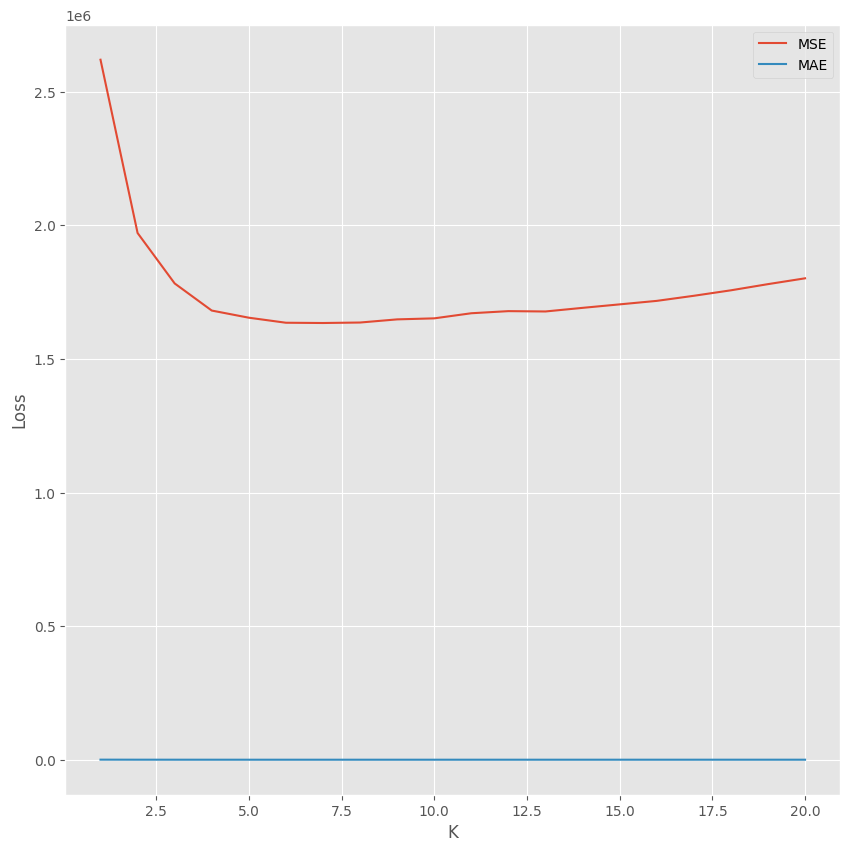

Minimum RMSE (MSE) 1634770.9797389277 is at k = 7
Minimum RMSE (MAE) 916.7685840438014 is at k = 8


In [41]:
rmse_val_mse = []
rmse_val_mae = []

for k in range(1, 21):
    rmse_val_mse.append(knn_regression(k, x_train, y_train, x_test, y_test, loss_function='mse'))
    rmse_val_mae.append(knn_regression(k, x_train, y_train, x_test, y_test, loss_function='mae'))


figure = plt.figure(figsize=(10, 10))
plt.plot(np.arange(1, 21), rmse_val_mse, label='MSE')
plt.plot(np.arange(1, 21), rmse_val_mae, label='MAE')
plt.xlabel("K")
plt.ylabel("Loss")
plt.legend()
plt.show()
rmse_val_mse = np.asarray(rmse_val_mse)
rmse_val_mae = np.asarray(rmse_val_mae)

print("Minimum RMSE (MSE) {} is at k = {}".format(np.min(rmse_val_mse), np.argmin(rmse_val_mse) + 1))
print("Minimum RMSE (MAE) {} is at k = {}".format(np.min(rmse_val_mae), np.argmin(rmse_val_mae) + 1))


The minimum RMSE value for the MSE loss is 1634770.9797389277, and it occurs at k = 7.
This means that, according to the MSE loss, the model performs best with k = 7, where the predictions are closest to the actual values on average.


The minimum RMSE value for the MAE loss is 916.7685840438014, and it occurs at k = 8.
This indicates that, according to the MAE loss, the model performs best with k = 8, considering the average absolute differences between predicted and actual values.


The minimum RMSE without specifying the loss function is 1278.5816281094171, and it occurs at k = 6.
This provides a baseline RMSE without considering a specific loss function.


the results suggest that the optimal choice of k depends on the loss function used. The minimum RMSE values and their corresponding k values may vary when using different loss functions. You may choose the model configuration (k value) that aligns with the evaluation metric or loss function

2.Explore other loss functions and try to understand when and why they are used.

Huber loss combines characteristics of MSE and MAE.
It is less sensitive to outliers like MAE but provides some error information for large errors.
It uses a delta parameter to determine the point where the loss function transitions from quadratic to linear.

Huber Loss is: 5.02


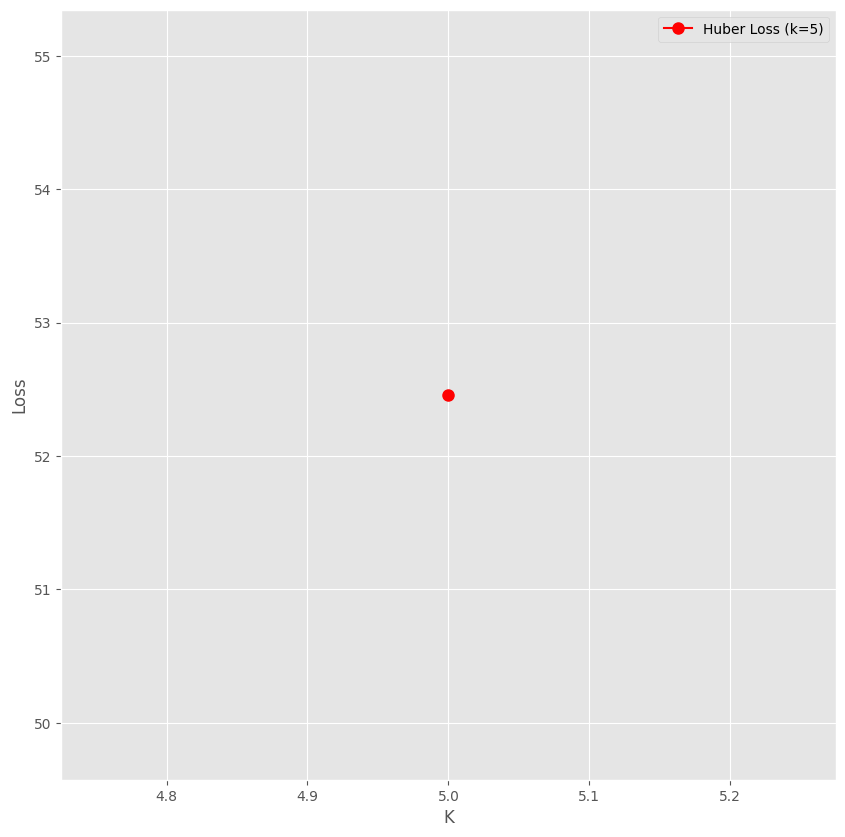

In [42]:
k_value=5
def huber_loss(y_actual, y_pred, delta=1.0):
    abs_diff = np.abs(y_actual - y_pred)
    return np.where(abs_diff < delta, 0.5 * (abs_diff ** 2), delta * (abs_diff - 0.5 * delta))

huber_loss_value = np.mean(huber_loss(y_actual, y_pred))
print("Huber Loss is: {}".format(huber_loss_value))

huber_loss_values = np.mean(huber_loss(y_actual, y_pred[k_value-1], delta=1.0))  # k_value-1 because array indices start from 0

# Plotting
figure, ax = plt.subplots(figsize=(10, 10))
plt.plot(k_value, huber_loss_values,marker ='o', markersize=8, color='red', label=f'Huber Loss (k={k_value})')
plt.xlabel("K")
plt.ylabel("Loss")
plt.legend()
plt.show()

Quantile loss measures the deviation of predicted quantiles from actual quantiles.
It is useful for asymmetric prediction intervals.
The loss function penalizes errors differently based on quantiles.

Quantile Loss (Tau=0.5) is: 2.75


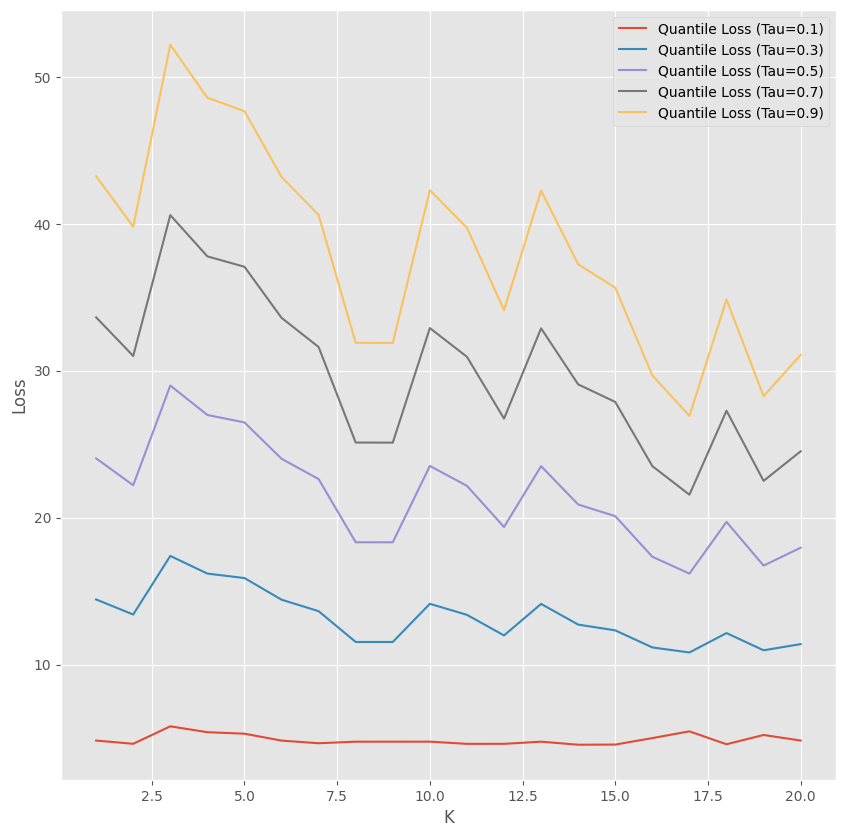

In [43]:
def quantile_loss(y_actual, y_pred, tau=0.5):
    error = y_actual - y_pred
    return np.where(error >= 0, tau * error, (tau - 1) * error)

quantile_loss_value = np.mean(quantile_loss(y_actual, y_pred))
print("Quantile Loss (Tau=0.5) is: {}".format(quantile_loss_value))

# Plotting Quantile Loss for different tau values
tau_values = [0.1, 0.3, 0.5, 0.7, 0.9]  # Adjust as needed
quantile_loss_values = np.array([[np.mean(quantile_loss(y_actual, y, tau)) for y in y_pred] for tau in tau_values])

figure, ax = plt.subplots(figsize=(10, 10))
for i, tau in enumerate(tau_values):
    plt.plot(np.arange(1, 21), quantile_loss_values[i][:20], label=f'Quantile Loss (Tau={tau})')

plt.xlabel("K")
plt.ylabel("Loss")
plt.legend()
plt.show()

MAE is often used when outliers should not be heavily penalized, Huber loss provides a compromise between MSE and MAE, and Quantile loss is useful for predicting different quantiles of the target distribution.

3.Try out KNN-regression on other datasets see which values of K give the best results.

In [44]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



In [45]:
from zipfile import ZipFile
from io import BytesIO
import requests

# Replace the URL with the actual URL of the ZIP file containing the dataset
uci_dataset_zip_url = "https://archive.ics.uci.edu/static/public/162/forest+fires.zip"

# Define the target CSV file name within the ZIP file
csv_file_name = "forestfires.csv"

# Fetch the ZIP file
response = requests.get(uci_dataset_zip_url)
zip_file = ZipFile(BytesIO(response.content))

# Read the CSV file from the ZIP archive into a Pandas DataFrame
with zip_file.open(csv_file_name) as csv_file:
    df = pd.read_csv(csv_file, delimiter=',')

# Display the first few rows of the dataset
print(df.head())


   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [46]:
# Extract features (X) and target variable (y)
X = df.drop('area', axis=1)  # Assuming 'area' is the target variable
y = df['area']

In [47]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
categorical_columns = ['month', 'day']  # Add your categorical columns here
numerical_columns = list(set(X.columns) - set(categorical_columns))


In [49]:
# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ]
)

In [50]:
# Create a pipeline with the column transformer and k-NN regressor
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor())
])


In [51]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

In [52]:
# Evaluate the performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 107.30244676810999


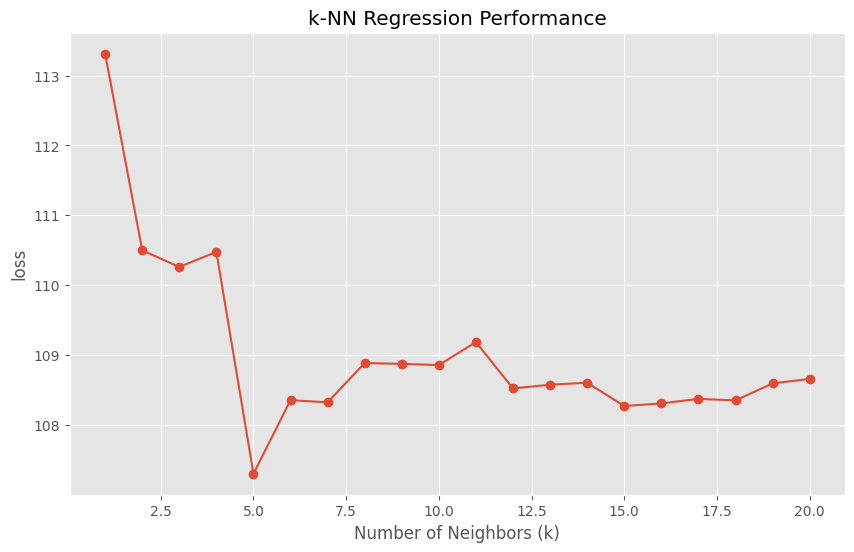

Minimum error 107.30244676810999 is at k = 4


In [53]:
# Plot the RMSE values for different k
k_values = range(1, 21)
rmse_values = []

for k in k_values:
    pipeline.set_params(regressor__n_neighbors=k)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_values.append(rmse)

# Plot the RMSE values for different k
plt.figure(figsize=(10, 6))
plt.plot(k_values, rmse_values, marker='o')
plt.title('k-NN Regression Performance')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('loss')
plt.show()
rmse_values = np.asarray(rmse_values)

print("Minimum error {} is at k = {}".format(np.min(rmse_values),np.argmin(rmse_values)))